**This is Airbnb NYC dataset we have do some task for our project.**

*   Task: 1. Analyze the dataset and create a story around it (trends, insights, patterns).
*   Task: 2. Prepare a short presentation that can be understood by non-technical people.
*   Task 3. Use visualizations to make your story clear and engaging.




##PHASE 1 — Data Understanding & Setup ##

**1. Define the Goal & Audience**


Goal: Find trends and insights about Airbnb listings in NYC.

Audience: Non-technical (Airbnb stakeholders, city tourism board).

Deliverable: Clear narrative supported by visuals.

**2. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from datetime import datetime

# Plot settings
%matplotlib inline
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
RANDOM_SEED = 42

**3. Load & Inspect Dataset**

In [ ]:
df=pd.read_csv("/content/AB_NYC_2019.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# quick missing value check
df.isnull().sum().sort_values(ascending=False)


,0
last_review,10052
reviews_per_month,10052
host_name,21
name,16
neighbourhood_group,0
neighbourhood,0
id,0
host_id,0
longitude,0
latitude,0


In [ ]:
df['neighbourhood'].value_counts()

,count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
...,...
Richmondtown,1
Fort Wadsworth,1
New Dorp,1


In [ ]:
df['name'].nunique()

47905

In [ ]:
total_neighbourhood_count = df['neighbourhood'].nunique()
print(f"Total number of unique neighbourhoods: {total_neighbourhood_count}")

Total number of unique neighbourhoods: 221


In [ ]:
total_neighbourhood_group_count = df['neighbourhood_group'].nunique()
print(f"Total number of unique neighbourhood groups: {total_neighbourhood_group_count}")

Total number of unique neighbourhood groups: 5


In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df['room_type'].nunique()

3

In [ ]:
df['host_name'].nunique()

11452

**5. Initial Observation**



*   Total Listing -- 48895
*   Total No of hotel are 47905
*   Dataset have some missing value
*   Price Range from 0 to 10,0000
*   Min Night Range from 0 to 1250
*   No of review vary from 0 to 629
*   No of unique neigbourhood is 221
*   No of unique neigbour group is 5
*   No of unique room type is 3
*   Total No of hoat are 11452


Note - we have to do lots of preprocessing like handling missing value , handling outlier, handling datatypes and feature engineering.





## PHASE 2 - Data Preprocessing (Important) ##

**1. Handle Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
##checking id having duplicates or not
df['id'].duplicated().sum()

np.int64(0)

In [ ]:
df['name'].duplicated().sum()
## 989 hotels are having duplicates

np.int64(989)

In [ ]:
df['host_name'].duplicated().sum()

np.int64(37442)

In [ ]:
df['host_id'].duplicated().sum()
# host name-- 11452 and host id -- 11438 we have to remove or fill the host name using host id

np.int64(11438)

In [ ]:
#there is no duplicates in data but for removing duplicates use this code
df.drop_duplicates()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.shape


(48895, 16)

**2.Fix Data Types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

**3.Handling Missing Value**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
last_review,10052
reviews_per_month,10052
host_name,21
name,16
neighbourhood_group,0
neighbourhood,0
id,0
host_id,0
longitude,0
latitude,0


In [ ]:
# Create a mapping from host_id to host_name for non-missing host names
host_name_map = df.dropna(subset=['host_name']).set_index('host_id')['host_name'].to_dict()

# Impute missing host_names using the map
df['host_name'] = df.apply(lambda row: host_name_map.get(row['host_id'], row['host_name']), axis=1)

# Check if there are still missing host names (should only be if a host_id had no non-missing host_name)
print("Missing values after host_name imputation:")
print(df.isnull().sum().sort_values(ascending=False))

Missing values after host_name imputation:
last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


We can see there is no connection between them that why it dont fill any missing value , we have to try another method.

In [ ]:
# Check for rows where both 'host_name' and 'name' are missing
missing_name_and_host = df[df['host_name'].isnull() & df['name'].isnull()]

print("Rows with both missing name and host_name:")
display(missing_name_and_host)

Rows with both missing name and host_name:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


there is no common missing value between them so we have  to fill one by one

In [ ]:
# Fill missing values in 'name' with 'Unknown'
df['name'].fillna('Unknown', inplace=True)

# Verify that missing values in 'name' have been handled
print("Missing values in 'name' after imputation:")
print(df['name'].isnull().sum())

Missing values in 'name' after imputation:
0


/tmp/ipython-input-4021731625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)


In [ ]:
# Fill remaining missing values in 'host_name' with 'Unknown'
df['host_name'].fillna('Unknown', inplace=True)

# Verify that missing values in 'host_name' have been handled
print("Missing values in 'host_name' after imputation:")
print(df['host_name'].isnull().sum())


Missing values in 'host_name' after imputation:
0


/tmp/ipython-input-679128501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_name'].fillna('Unknown', inplace=True)


In [ ]:
# Fill missing values in 'reviews_per_month' with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Verify that missing values in 'reviews_per_month' have been handled
print("Missing values in 'reviews_per_month' after imputation:")
print(df['reviews_per_month'].isnull().sum())


Missing values in 'reviews_per_month' after imputation:
0


In [ ]:
# Fill missing values in 'last_review' with a date before the dataset's timeframe
df['last_review'] = df['last_review'].fillna(pd.to_datetime('1900-01-01'))

# Verify that missing values in 'last_review' have been handled
print("Missing values in 'last_review' after imputation:")
print(df['last_review'].isnull().sum())

Missing values in 'last_review' after imputation:
0


In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Finally we have impute the missing value .

## PHASE 3 -- Outliers Detection and Treatment ##

In [ ]:
# 1) Normalize price: price per night
df["price_per_night"] = df["price"] / df["minimum_nights"]
df.loc[df["minimum_nights"] == 0, "price_per_night"] = np.nan

# 2) Helper: IQR bounds
def iqr_bounds(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper

# 3) Segment-aware winsorization:
#    Cap outliers per (neighbourhood_group, room_type) for fairness
segment_cols = ["neighbourhood_group", "room_type"]
for seg, group in df.groupby(segment_cols):
    idx = group.index
    # price_per_night
    lower_p, upper_p = iqr_bounds(group["price_per_night"].dropna(), k=1.5)
    df.loc[idx, "price_per_night"] = np.clip(df.loc[idx, "price_per_night"], lower_p, upper_p)
    # minimum_nights (booking policy outliers)
    lower_m, upper_m = iqr_bounds(group["minimum_nights"].dropna(), k=1.5)
    df.loc[idx, "minimum_nights"] = np.clip(df.loc[idx, "minimum_nights"], max(1, lower_m), upper_m)
    # reviews_per_month (demand spikes)
    if "reviews_per_month" in df.columns:
        lower_r, upper_r = iqr_bounds(group["reviews_per_month"].dropna(), k=1.5)
        df.loc[idx, "reviews_per_month"] = np.clip(df.loc[idx, "reviews_per_month"], lower_r, upper_r)

# 4) Availability sanity (non-winsorized logical cap)
df["availability_365"] = df["availability_365"].clip(lower=0, upper=365)

# 5) Quick validation
print("Rows unchanged:", df.shape)
print(df[["price","minimum_nights","price_per_night","reviews_per_month","availability_365"]].describe())

/tmp/ipython-input-3347852640.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.  4.5 1.  2.  2.  4.5 3.  2.  1.  3.  4.5 3.  4.5 1.  4.5 4.  3.  2.
 4.5 4.5 1.  4.5 2.  4.5 4.5 1.  2.  1.  2.  4.  4.5 2.  2.  4.  2.  4.
 1.  3.  2.  1.  1.  2.  2.  2.  1.  2.  1.  3.  1.  1.  1.  4.5 4.5 1.
 4.5 3.  3.  3.  2.  2.  1.  4.5 4.5 1.  1.  1.  2.  3.  2.  4.5 2.  3.
 2.  1.  4.5 3.  1.  4.5 2.  2.  1.  1.  4.5 1.  4.5 1.  2.  1.  2.  4.5
 4.5 4.5 2.  3.  2.  1.  4.5 2.  2.  4.  3.  3.  2.  4.5 4.5 4.5 4.5 4.5
 4.5 4.  4.5 4.5 4.5 2.  3.  3.  2.  2.  4.  3.  2.  1.  2.  4.5 2.  4.
 4.5 1.  3.  1.  4.5 3.  2.  3.  4.5 2.  4.5 3.  2.  4.5 2.  2.  3.  2.
 4.5 2.  2.  1.  1.  2.  2.  2.  2.  2.  2.  3.  2.  2.  3.  2.  3.  2.
 1.  2.  3.  4.5 2.  2.  1.  1.  2.  2.  1.  1.  1.  2.  3.  2.  4.5 1.
 3.  3.  3.  2.  2.  1.  2.  4.5 1.  2.  4.5 3.  3.  2.  1.  2.  2.  2.
 2.  2.  2.  2.  1.  2.  1.  1.  1.  1. 

Rows unchanged: (48895, 17)
              price  minimum_nights  price_per_night  reviews_per_month  \
count  48895.000000    48895.000000     48895.000000       48895.000000   
mean     152.720687        3.843936        59.654203           0.981049   
std      240.154170        3.579908        55.549030           1.252942   
min        0.000000        1.000000         0.000000           0.000000   
25%       69.000000        1.000000        20.000000           0.040000   
50%      106.000000        3.000000        44.500000           0.370000   
75%      175.000000        5.000000        81.500000           1.580000   
max    10000.000000       16.000000       271.285714           7.255000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000  


In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9,2018-10-19,0.21,6,365,110.8375


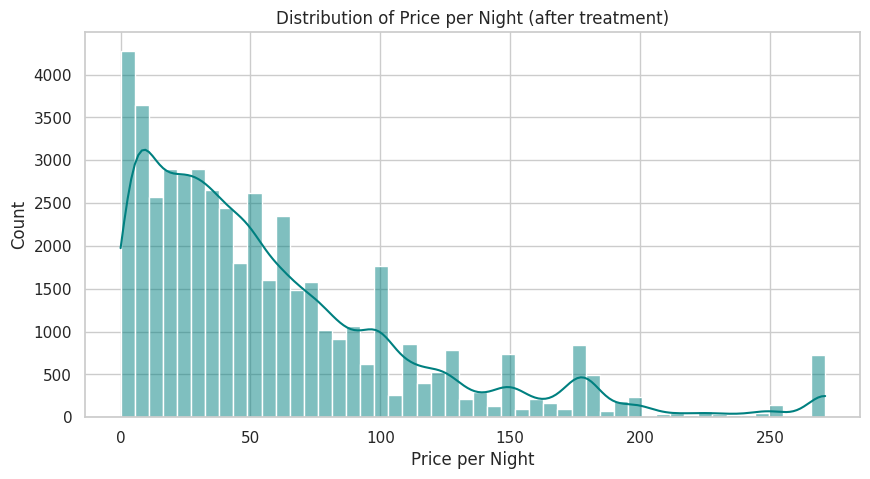

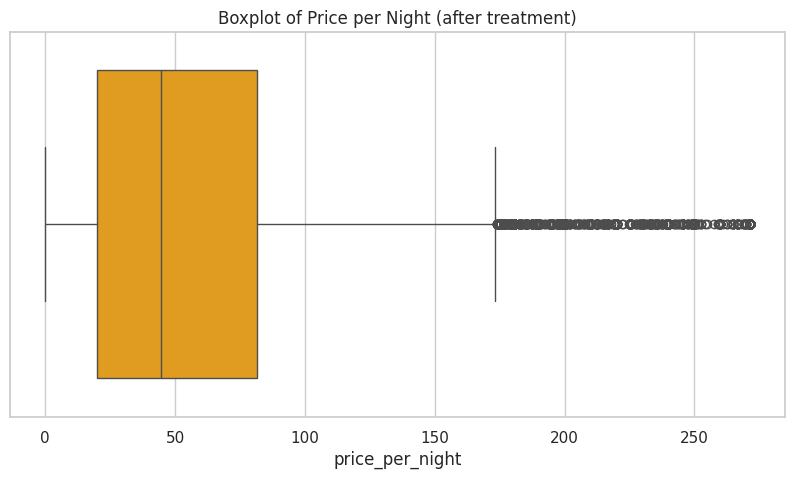

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["price_per_night"], bins=50, kde=True, color="teal")
plt.title("Distribution of Price per Night (after treatment)")
plt.xlabel("Price per Night")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df["price_per_night"], color="orange")
plt.title("Boxplot of Price per Night (after treatment)")
plt.show()

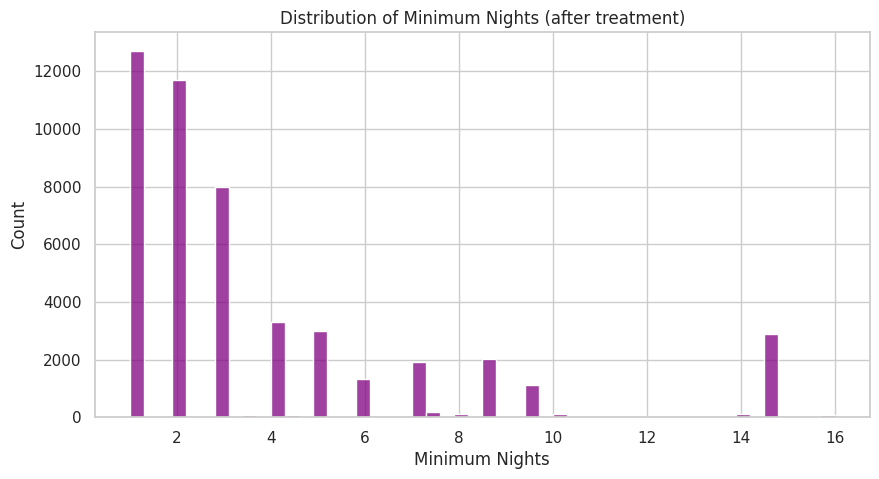

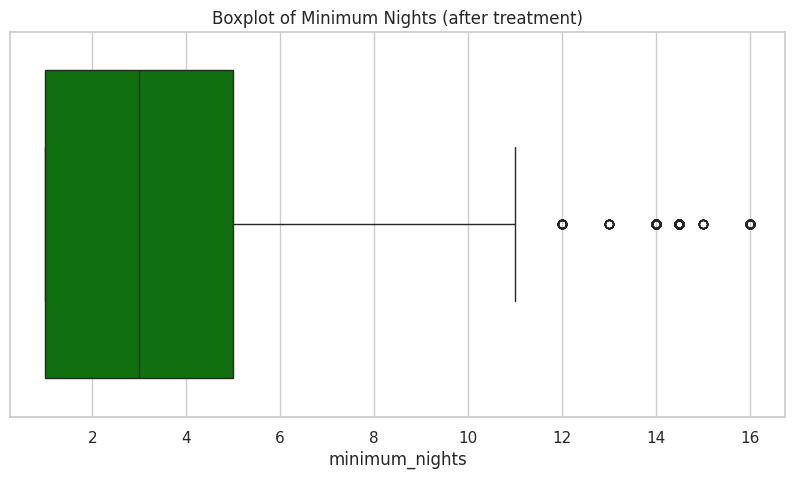

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["minimum_nights"], bins=50, kde=False, color="purple")
plt.title("Distribution of Minimum Nights (after treatment)")
plt.xlabel("Minimum Nights")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df["minimum_nights"], color="green")
plt.title("Boxplot of Minimum Nights (after treatment)")
plt.show()

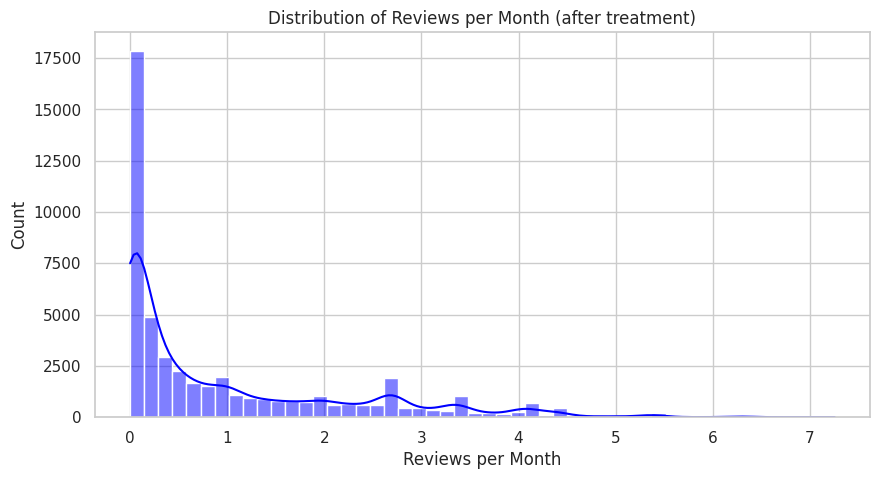

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["reviews_per_month"], bins=50, kde=True, color="blue")
plt.title("Distribution of Reviews per Month (after treatment)")
plt.xlabel("Reviews per Month")
plt.ylabel("Count")
plt.show()

## PHASE 4 - Feature Engineering ##

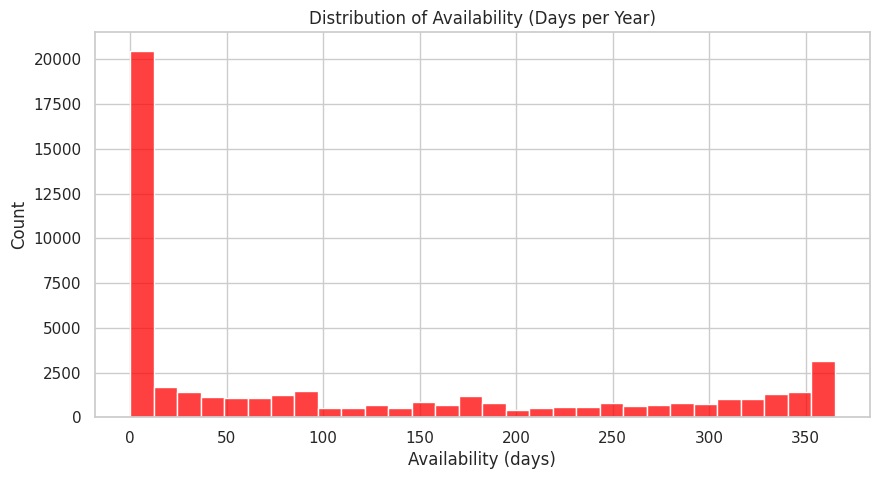

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["availability_365"], bins=30, kde=False, color="red")
plt.title("Distribution of Availability (Days per Year)")
plt.xlabel("Availability (days)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Find the most visited Airbnb (highest number_of_reviews)
most_visited = df.loc[df["number_of_reviews"].idxmax()]

print("Most visited Airbnb:")
print(most_visited[["id","name","neighbourhood_group","neighbourhood",
                    "latitude","longitude","number_of_reviews"]])


Most visited Airbnb:
id                                     9145202
name                   Room near JFK Queen Bed
neighbourhood_group                     Queens
neighbourhood                          Jamaica
latitude                               40.6673
longitude                            -73.76831
number_of_reviews                          629
Name: 11759, dtype: object


In [ ]:
# --- a) Transformation ---
# Log transform to reduce skewness
df["log_price_per_night"] = np.log1p(df["price_per_night"])

# Min-max scaling (0–1)
df["scaled_price_per_night"] = (
    (df["price_per_night"] - df["price_per_night"].min()) /
    (df["price_per_night"].max() - df["price_per_night"].min())
)

# --- b) Encoding ---
# One-hot encoding for room_type
room_dummies = pd.get_dummies(df["room_type"], prefix="room", drop_first=True)
df = pd.concat([df, room_dummies], axis=1)

# Label encoding for neighbourhood_group
df["neighbourhood_group_encoded"] = df["neighbourhood_group"].astype("category").cat.codes

# --- c) Binning / Bucketing ---
# Stay length categories
max_nights = df["minimum_nights"].max()
upper_nights = max(31, max_nights)   # ensure >30
df["stay_length"] = pd.cut(
    df["minimum_nights"],
    bins=[0, 3, 7, 30, upper_nights],
    labels=["short_stay","week_stay","month_stay","long_stay"],
    include_lowest=True
)

# Host type categories
max_hosts = df["calculated_host_listings_count"].max()
upper_hosts = max(11, max_hosts)   # ensure >10
df["host_type"] = pd.cut(
    df["calculated_host_listings_count"],
    bins=[0, 1, 3, 10, upper_hosts],
    labels=["casual","multi","professional","enterprise"],
    include_lowest=True
)

# --- d) Interaction Features ---
# Price per review (handle division by zero)
df["price_per_review"] = np.where(
    df["number_of_reviews"] > 0,
    df["price"] / df["number_of_reviews"],
    0  # Or np.nan, depending on desired handling of no reviews
)

# --- e) Review-based Features ---
# Availability ratio (handle division by zero)
df["availability_ratio"] = np.where(
    df["calculated_host_listings_count"] > 0,
    df["availability_365"] / (df["calculated_host_listings_count"] * 365),
    0 # Or np.nan
)

# --- f) Time-based Features ---
# Extract year from last_review
# Assuming '1900-01-01' was used for missing values, this will result in 1900
df["last_review_year"] = df["last_review"].dt.year

# Days since last review (assuming current date is around the dataset's timeframe, e.g., mid-2019)
# For a realistic calculation, you'd need a specific "as of" date.
# Using a placeholder date close to the dataset's last reviews for illustration:
current_date = pd.to_datetime('2019-07-08') # A date slightly after the latest review in the dataset
df["days_since_last_review"] = (current_date - df["last_review"]).dt.days
# Cap negative values (for reviews after current_date if any) or very large values if 1900-01-01 is used
df["days_since_last_review"] = df["days_since_last_review"].clip(lower=0)


# --- g) Geospatial Features ---
# Times Square coordinates
times_square_lat, times_square_lon = 40.7580, -73.9855

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    return R * c

df["dist_times_square_km"] = haversine(df["latitude"], df["longitude"], times_square_lat, times_square_lon)

# --- Quick check ---
print(df[[
    "price_per_night","log_price_per_night","scaled_price_per_night",
    "stay_length","host_type","price_per_review","availability_ratio",
    "last_review_year","days_since_last_review","dist_times_square_km"
]].head())

   price_per_night  log_price_per_night  scaled_price_per_night stay_length  \
0         110.8375             4.717047                0.408564  short_stay   
1         225.0000             5.420535                0.829384  short_stay   
2          50.0000             3.931826                0.184308  short_stay   
3          89.0000             4.499810                0.328067  short_stay   
4           8.0000             2.197225                0.029489  month_stay   

      host_type  price_per_review  availability_ratio  last_review_year  \
0  professional         16.555556            0.166667              2018   
1         multi          5.000000            0.486301              2019   
2        casual          0.000000            1.000000              1900   
3        casual          0.329630            0.531507              2019   
4        casual          8.888889            0.000000              2018   

   days_since_last_review  dist_times_square_km  
0                     26

In [ ]:
# Coordinates of the most visited Airbnb
ref_lat, ref_lon = 40.6673, -73.76831

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    return R * c

# Distance from most visited Airbnb
df["dist_from_most_visited_km"] = haversine(df["latitude"], df["longitude"], ref_lat, ref_lon)

# Quick check
print(df[["id","neighbourhood_group","price_per_night","dist_from_most_visited_km"]].head())

     id neighbourhood_group  price_per_night  dist_from_most_visited_km
0  2539            Brooklyn         110.8375                  17.353763
1  2595           Manhattan         225.0000                  20.541041
2  3647           Manhattan          50.0000                  21.499600
3  3831            Brooklyn          89.0000                  16.266535
4  5022           Manhattan           8.0000                  20.784181


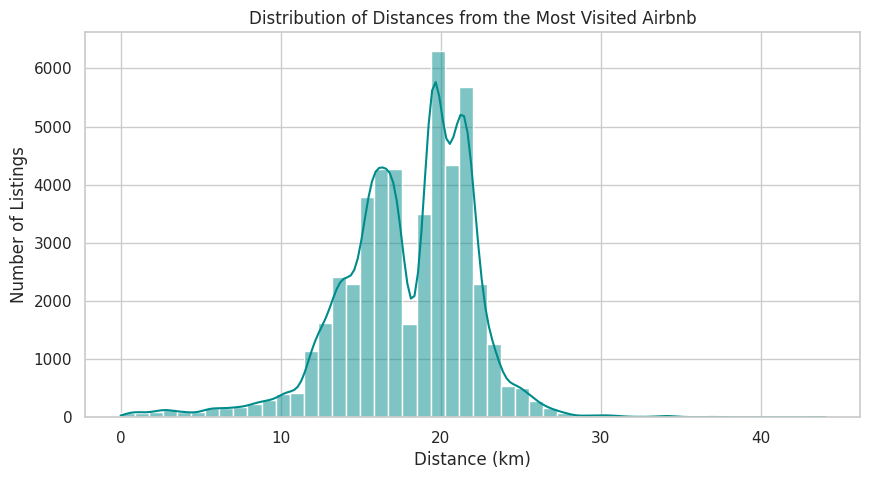

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["dist_from_most_visited_km"], bins=50, kde=True, color="darkcyan")
plt.title("Distribution of Distances from the Most Visited Airbnb")
plt.xlabel("Distance (km)")
plt.ylabel("Number of Listings")
plt.show()

In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,room_Shared room,neighbourhood_group_encoded,stay_length,host_type,price_per_review,availability_ratio,last_review_year,days_since_last_review,dist_times_square_km,dist_from_most_visited_km
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,False,1,short_stay,professional,16.555556,0.166667,2018,262,12.337898,17.353763


## PHASE 5 - Exploratory Data Analytics(EDA)

### Univariate Analysis - Stay Length

Analyzing the distribution of listings based on the categorized minimum stay length.

/tmp/ipython-input-2285085774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stay_length', order=df['stay_length'].value_counts().index, palette='viridis')


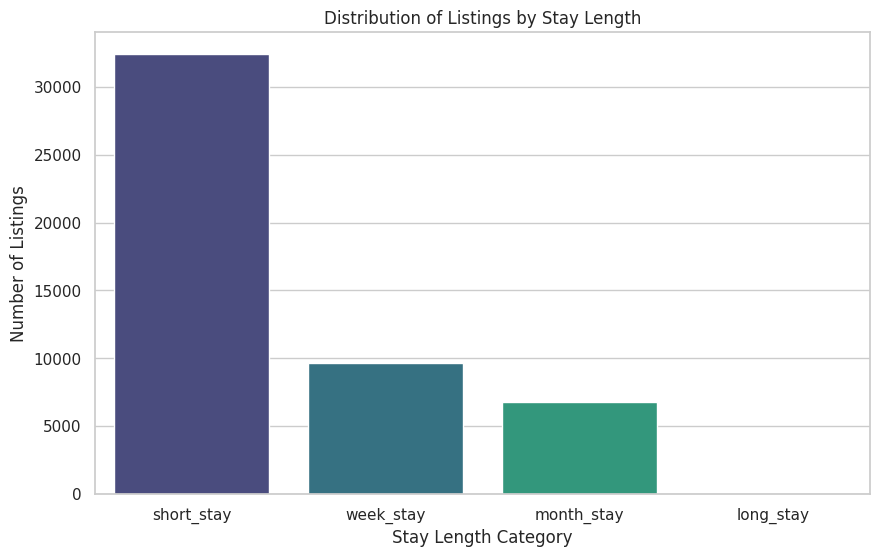

stay_length
short_stay    32421
week_stay      9682
month_stay     6792
long_stay         0
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stay_length', order=df['stay_length'].value_counts().index, palette='viridis')
plt.title('Distribution of Listings by Stay Length')
plt.xlabel('Stay Length Category')
plt.ylabel('Number of Listings')
plt.show()

print(df['stay_length'].value_counts())

### Univariate Analysis - Host Type

Analyzing the distribution of listings based on the categorized host type (casual, multi, professional, enterprise).

/tmp/ipython-input-3351971302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='host_type', order=df['host_type'].value_counts().index, palette='viridis')


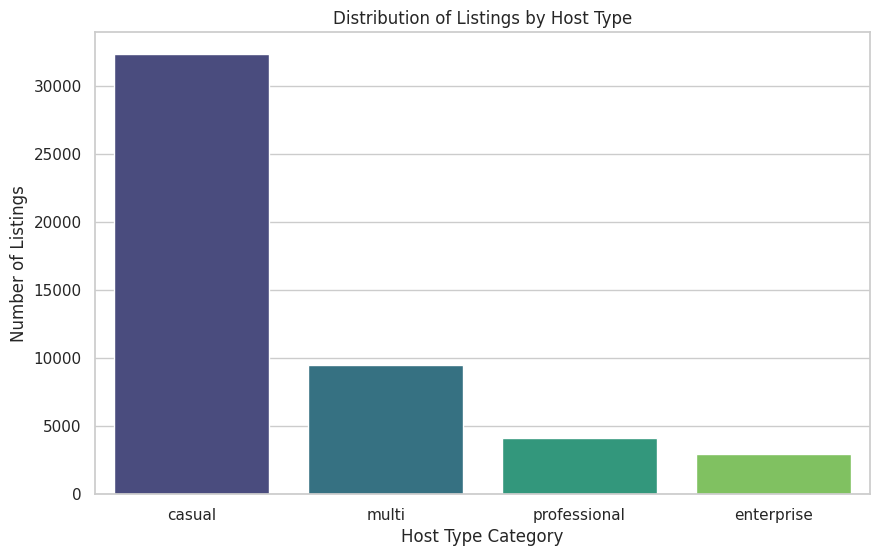

host_type
casual          32303
multi            9511
professional     4114
enterprise       2967
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='host_type', order=df['host_type'].value_counts().index, palette='viridis')
plt.title('Distribution of Listings by Host Type')
plt.xlabel('Host Type Category')
plt.ylabel('Number of Listings')
plt.show()

print(df['host_type'].value_counts())

### Univariate Analysis - Room Type

Analyzing the distribution of different room types available in the listings.

/tmp/ipython-input-4265344324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette='viridis')


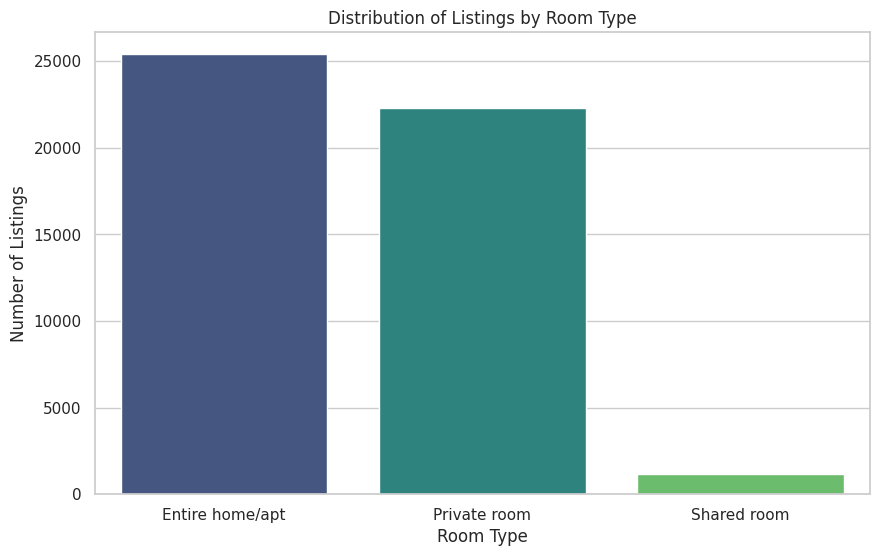

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette='viridis')
plt.title('Distribution of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

print(df['room_type'].value_counts())

### Univariate Analysis - Neighbourhood Group

Examining the distribution of listings across the different neighbourhood groups in NYC.

/tmp/ipython-input-311370659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index, palette='viridis')


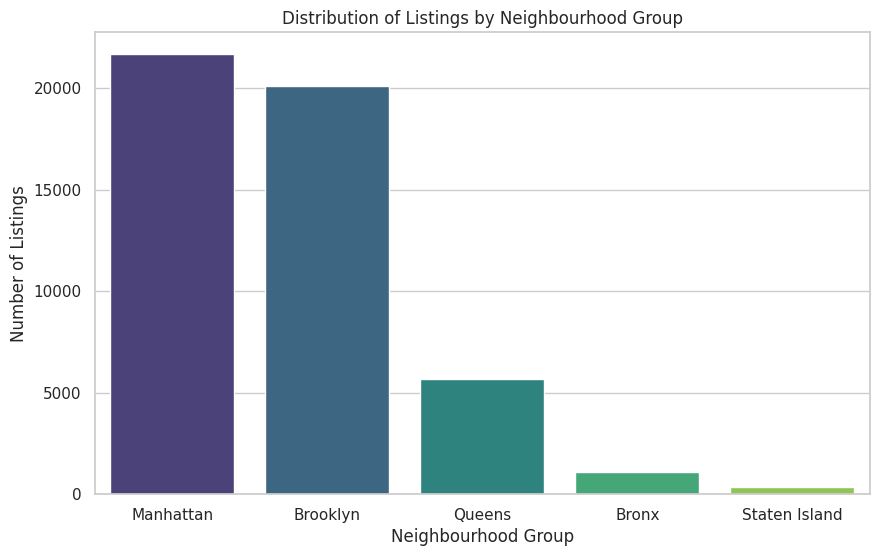

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index, palette='viridis')
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()

print(df['neighbourhood_group'].value_counts())

### Univariate Analysis - Days Since Last Review

Analyzing the distribution of the number of days since a listing received its last review. This can indicate how active or popular a listing is.

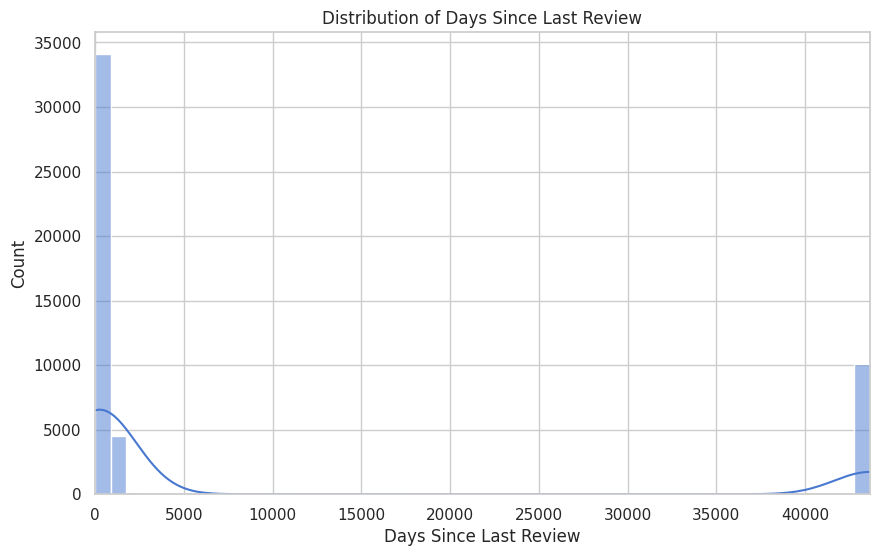

count    48895.000000
mean      9194.120421
std      17533.112116
min          0.000000
25%         19.000000
50%        186.000000
75%       1201.000000
max      43652.000000
Name: days_since_last_review, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['days_since_last_review'], bins=50, kde=True)
plt.title('Distribution of Days Since Last Review')
plt.xlabel('Days Since Last Review')
plt.ylabel('Count')
# Limiting x-axis for better visualization of the main distribution, excluding the '1900-01-01' filled values
plt.xlim(0, df['days_since_last_review'].quantile(0.99))
plt.show()

print(df['days_since_last_review'].describe())

### Univariate Analysis - Price per Night

Analyzing the distribution of the price per night, a normalized price metric.

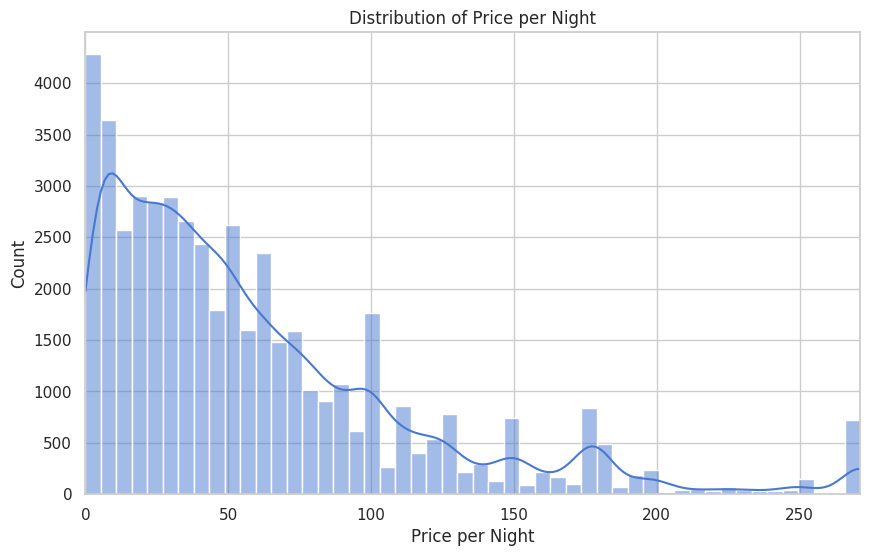

count    48895.000000
mean        59.654203
std         55.549030
min          0.000000
25%         20.000000
50%         44.500000
75%         81.500000
max        271.285714
Name: price_per_night, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_night'], bins=50, kde=True)
plt.title('Distribution of Price per Night')
plt.xlabel('Price per Night')
plt.ylabel('Count')
plt.xlim(0, df['price_per_night'].quantile(0.99)) # Limit x-axis for better visualization
plt.show()

print(df['price_per_night'].describe())

### Univariate Analysis - Availability 365

Examining the distribution of the number of days a listing is available throughout the year.

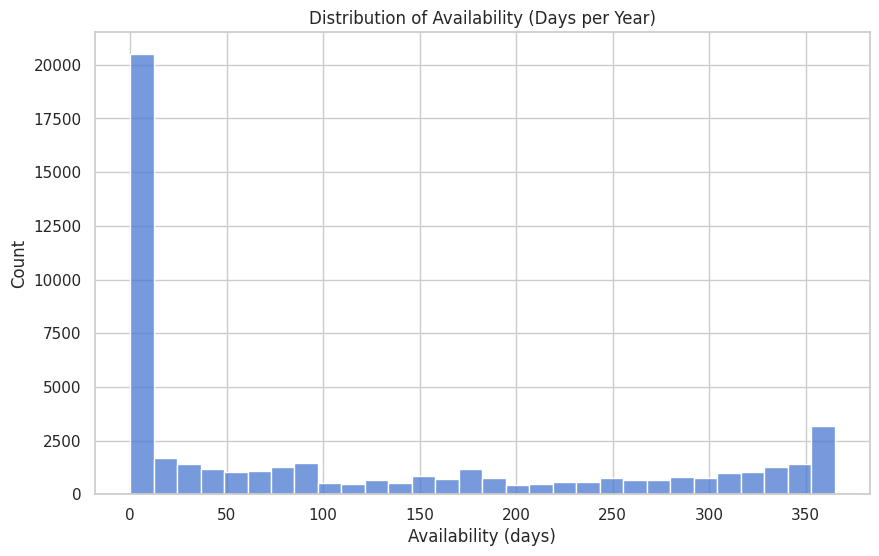

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=False)
plt.title('Distribution of Availability (Days per Year)')
plt.xlabel('Availability (days)')
plt.ylabel('Count')
plt.show()

print(df['availability_365'].describe())

### Univariate Analysis - Calculated Host Listings Count

Analyzing the distribution of the number of listings per host.

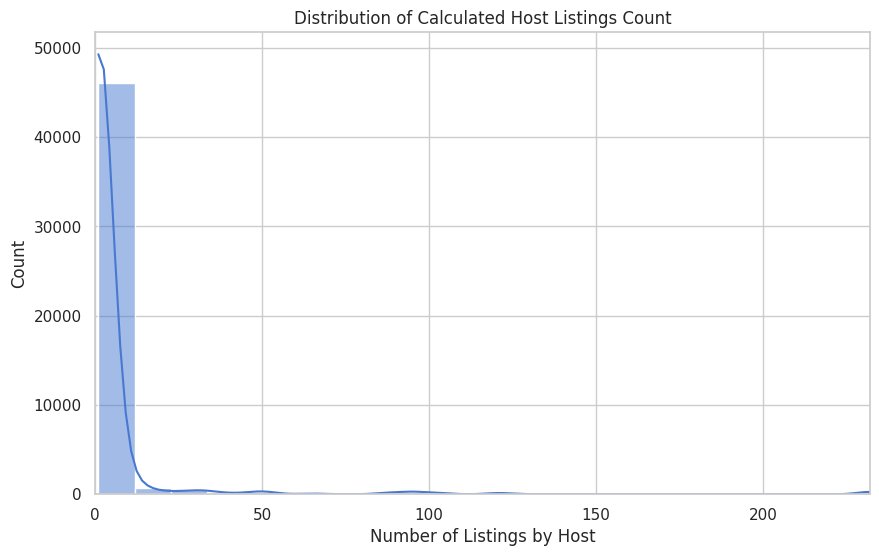

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['calculated_host_listings_count'], bins=30, kde=True)
plt.title('Distribution of Calculated Host Listings Count')
plt.xlabel('Number of Listings by Host')
plt.ylabel('Count')
plt.xlim(0, df['calculated_host_listings_count'].quantile(0.99)) # Limit x-axis for better visualization
plt.show()

print(df['calculated_host_listings_count'].describe())

### Univariate Analysis - Reviews per Month

Examining the distribution of the average number of reviews a listing receives per month.

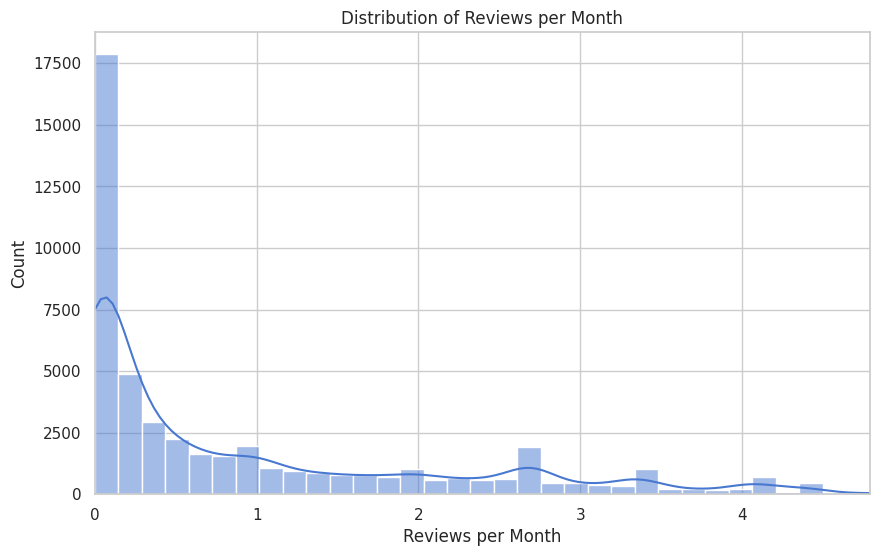

count    48895.000000
mean         0.981049
std          1.252942
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max          7.255000
Name: reviews_per_month, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=50, kde=True)
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Count')
plt.xlim(0, df['reviews_per_month'].quantile(0.99)) # Limit x-axis for better visualization
plt.show()

print(df['reviews_per_month'].describe())

### Univariate Analysis - Number of Reviews

Analyzing the distribution of the number of reviews listings have received.

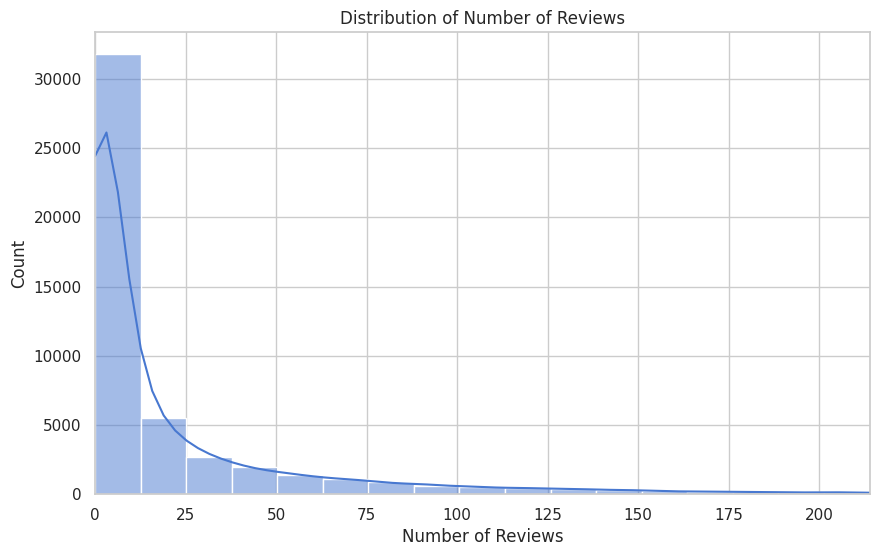

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], bins=50, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.xlim(0, df['number_of_reviews'].quantile(0.99)) # Limit x-axis for better visualization of the main distribution
plt.show()

print(df['number_of_reviews'].describe())

### Univariate Analysis - Minimum Nights

Examining the distribution of the minimum number of nights required for a booking.

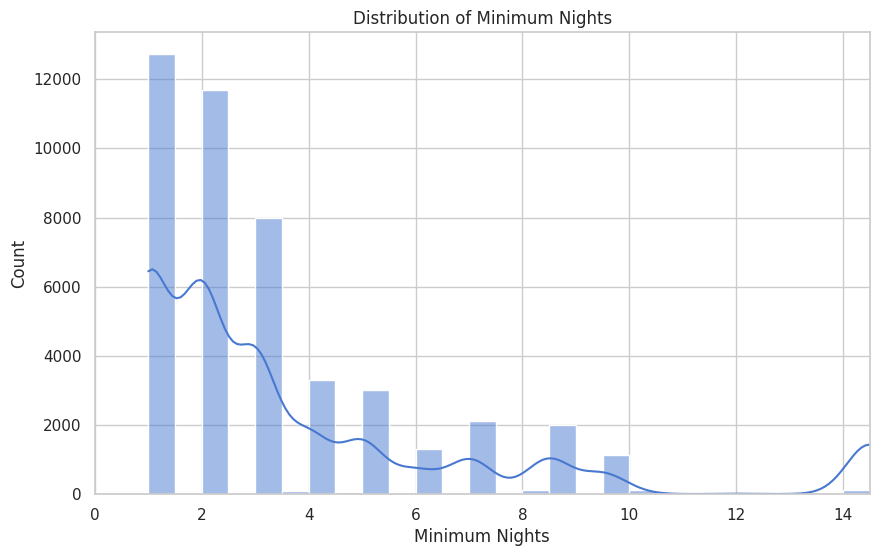

count    48895.000000
mean         3.843936
std          3.579908
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         16.000000
Name: minimum_nights, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=30, kde=True)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.xlim(0, df['minimum_nights'].quantile(0.99)) # Limit x-axis for better visualization
plt.show()

print(df['minimum_nights'].describe())

### Univariate Analysis - Price

Analyzing the distribution of listing prices to understand the typical cost of Airbnb accommodations in NYC.

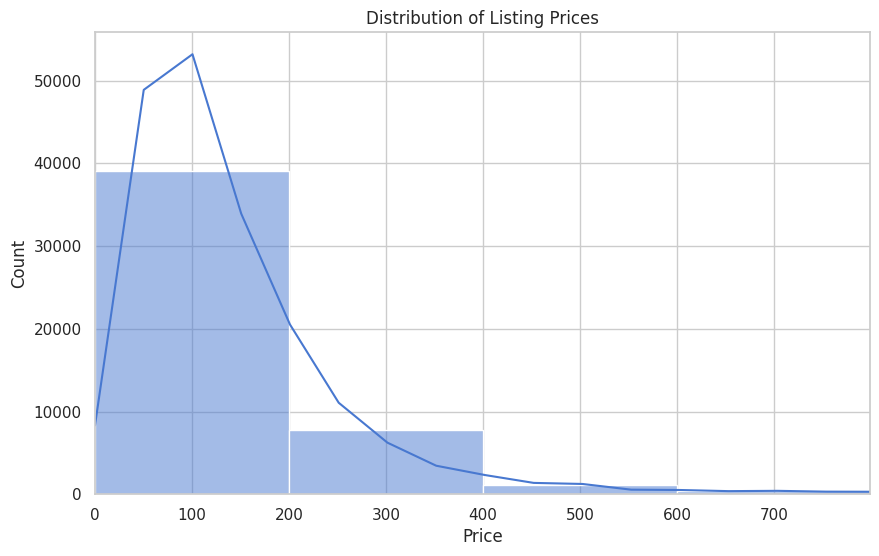

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xlim(0, df['price'].quantile(0.99)) # Limit x-axis for better visualization of main distribution
plt.show()

print(df['price'].describe())

##Multivariate ##

/tmp/ipython-input-3119628577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


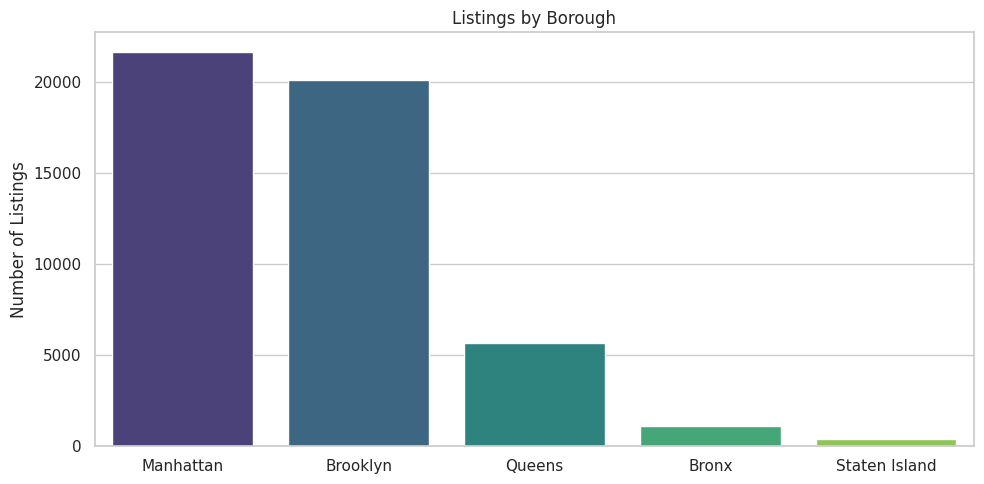

In [ ]:
#Supply concentration (listings by borough)
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x="neighbourhood_group",
    order=df["neighbourhood_group"].value_counts().index,
    palette="viridis"
)
plt.title("Listings by Borough")
plt.xlabel("")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

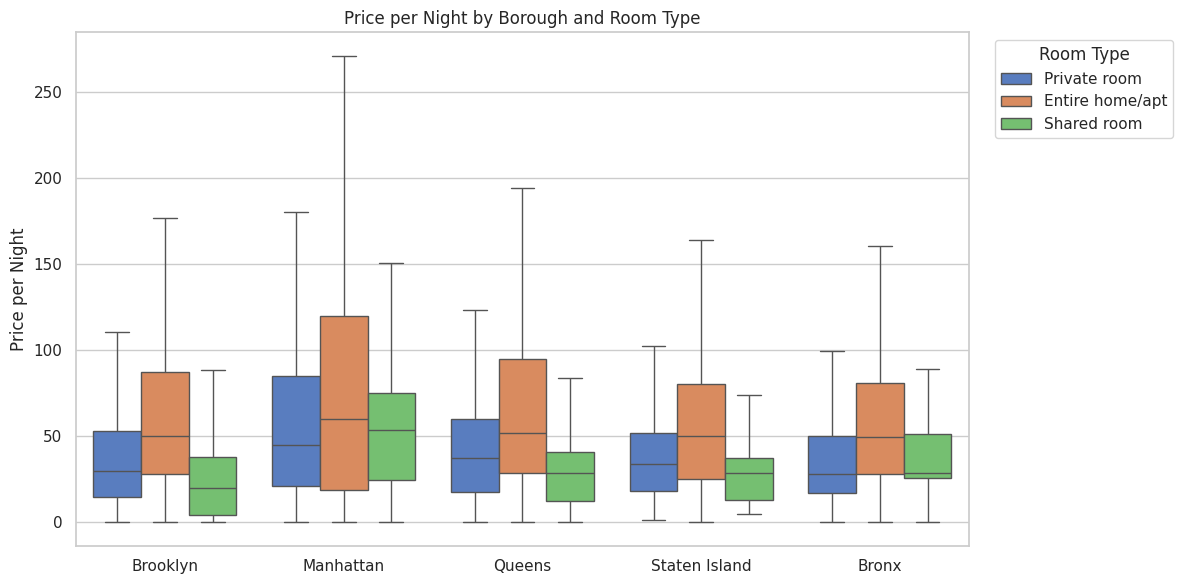

In [ ]:
#Pricing landscape (price per night by borough & room type)
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x="neighbourhood_group",
    y="price_per_night",
    hue="room_type",
    showfliers=False
)
plt.title("Price per Night by Borough and Room Type")
plt.ylabel("Price per Night")
plt.xlabel("")
plt.legend(title="Room Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2994242677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


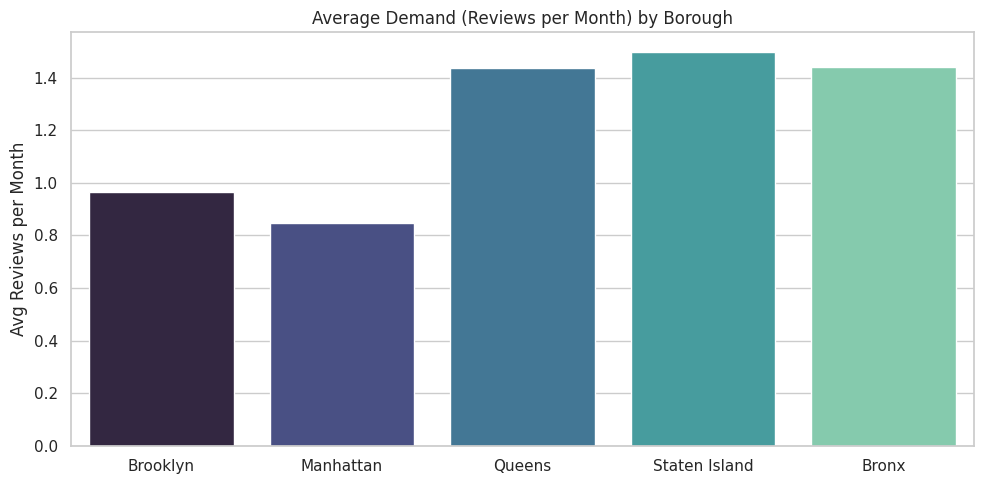

In [ ]:
#Demand signals (average reviews per month by borough)
plt.figure(figsize=(10,5))
sns.barplot(
    data=df,
    x="neighbourhood_group",
    y="reviews_per_month",
    estimator=np.mean,
    errorbar=None,
    palette="mako"
)
plt.title("Average Demand (Reviews per Month) by Borough")
plt.xlabel("")
plt.ylabel("Avg Reviews per Month")
plt.tight_layout()
plt.show()

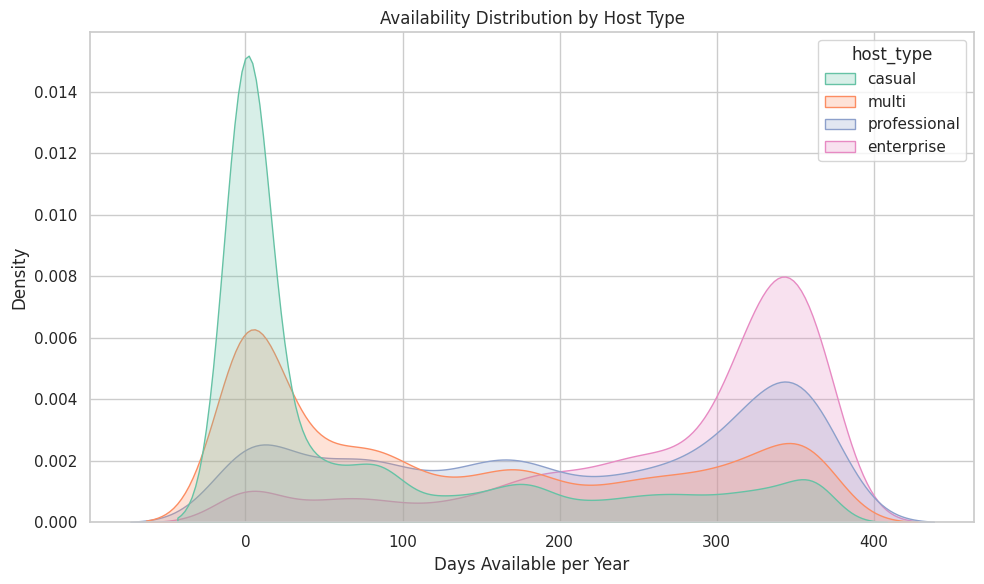

In [ ]:
#Host behavior (availability distribution: casual vs professional)
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df,
    x="availability_365",
    hue="host_type",
    fill=True,
    common_norm=False,
    palette="Set2"
)
plt.title("Availability Distribution by Host Type")
plt.xlabel("Days Available per Year")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1052710472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


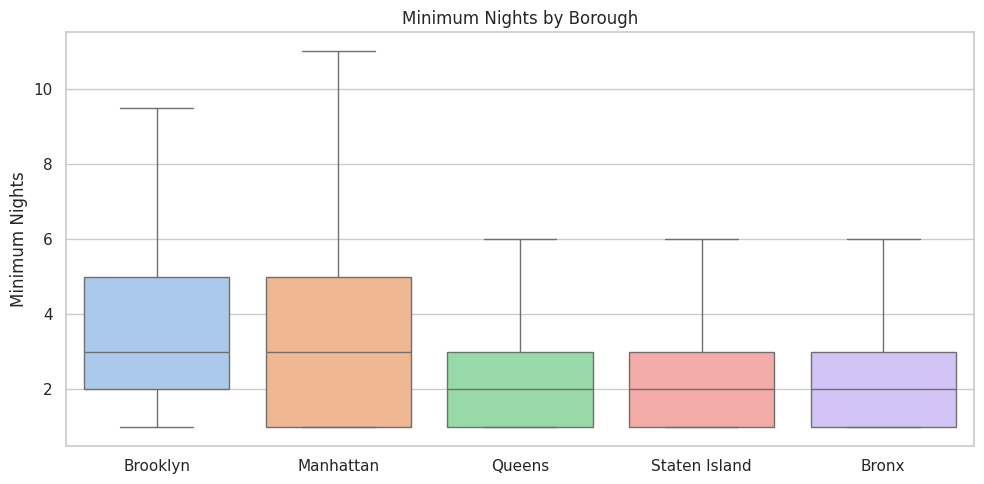

In [ ]:
#Booking flexibility (minimum nights by borough)
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df,
    x="neighbourhood_group",
    y="minimum_nights",
    showfliers=False,
    palette="pastel"
)
plt.title("Minimum Nights by Borough")
plt.xlabel("")
plt.ylabel("Minimum Nights")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate a robust upper bound
max_price = df["price_per_night"].max()

# Ensure the last bin edge is strictly greater than 300
upper = max(301, np.ceil(max_price))

# Define bins and labels
bins = [0, 75, 150, 300, upper]
labels = ["Budget","Mid","High","Premium"]

# Create price_band safely
df["price_band"] = pd.cut(
    df["price_per_night"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(df["price_band"].value_counts(dropna=False))

price_band
Budget     35635
Mid         9579
High        3681
Premium        0
Name: count, dtype: int64


/tmp/ipython-input-412227444.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["neighbourhood_group","price_band"])


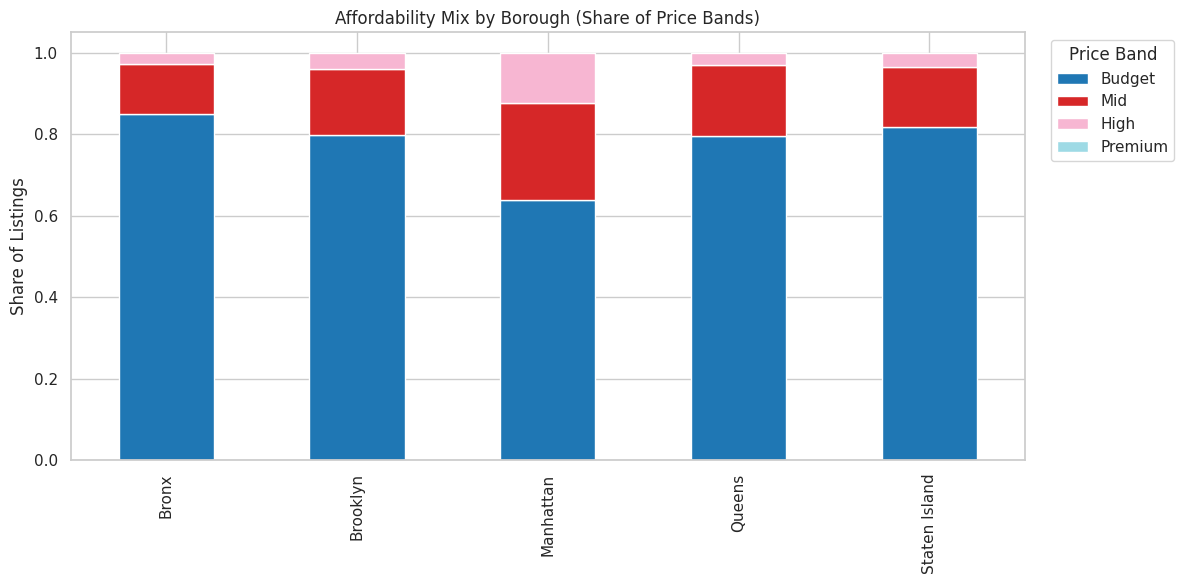

In [ ]:
# Ensure price_band exists
if "price_band" not in df.columns:
    max_price = df["price_per_night"].max()
    upper = max(301, np.ceil(max_price))  # ensure >300
    bins = [0, 75, 150, 300, upper]
    labels = ["Budget","Mid","High","Premium"]
    df["price_band"] = pd.cut(df["price_per_night"], bins=bins, labels=labels, include_lowest=True)

# Group and calculate counts
band_share = (
    df.groupby(["neighbourhood_group","price_band"])
      .size()
      .reset_index(name="count")
)

# Compute share safely using transform (avoids index mismatch)
band_share["share"] = band_share["count"] / band_share.groupby("neighbourhood_group")["count"].transform("sum")

# Pivot for stacked bar chart
pivot_share = band_share.pivot(index="neighbourhood_group", columns="price_band", values="share").fillna(0)

# Enforce column order
pivot_share = pivot_share.reindex(columns=["Budget","Mid","High","Premium"], fill_value=0)

# Plot
pivot_share.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Affordability Mix by Borough (Share of Price Bands)")
plt.xlabel("")
plt.ylabel("Share of Listings")
plt.legend(title="Price Band", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()



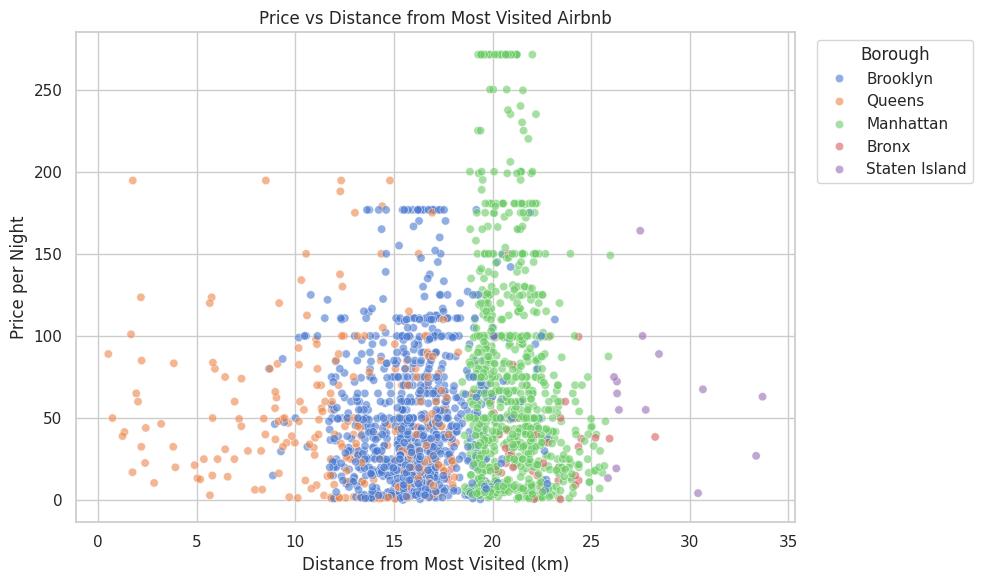

In [ ]:
#Distance effect (price vs distance from most visited Airbnb)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df.sample(2000, random_state=42),  # sample for clarity
    x="dist_from_most_visited_km",
    y="price_per_night",
    hue="neighbourhood_group",
    alpha=0.6
)
plt.title("Price vs Distance from Most Visited Airbnb")
plt.xlabel("Distance from Most Visited (km)")
plt.ylabel("Price per Night")
plt.legend(title="Borough", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

/tmp/ipython-input-469908353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


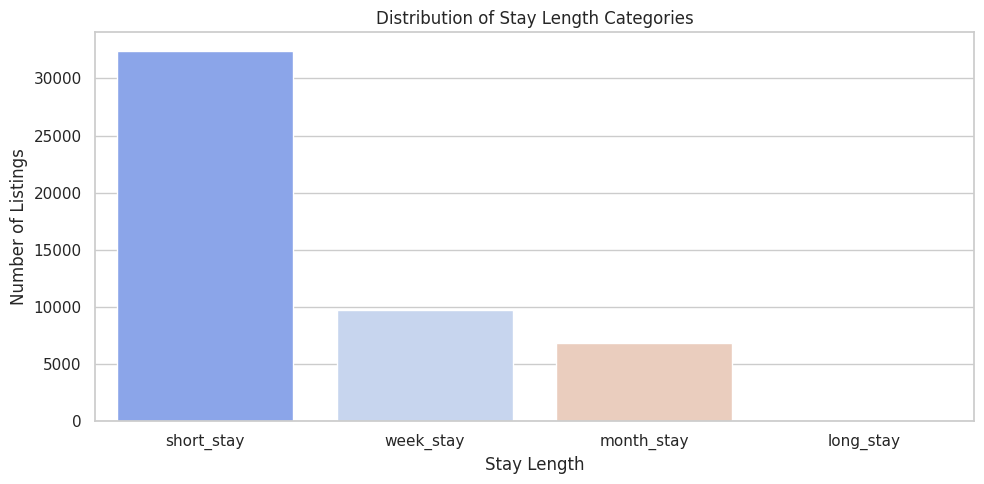

In [ ]:
#Stay length patterns (distribution of stay categories)
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x="stay_length",
    order=["short_stay","week_stay","month_stay","long_stay"],
    palette="coolwarm"
)
plt.title("Distribution of Stay Length Categories")
plt.xlabel("Stay Length")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2058371956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


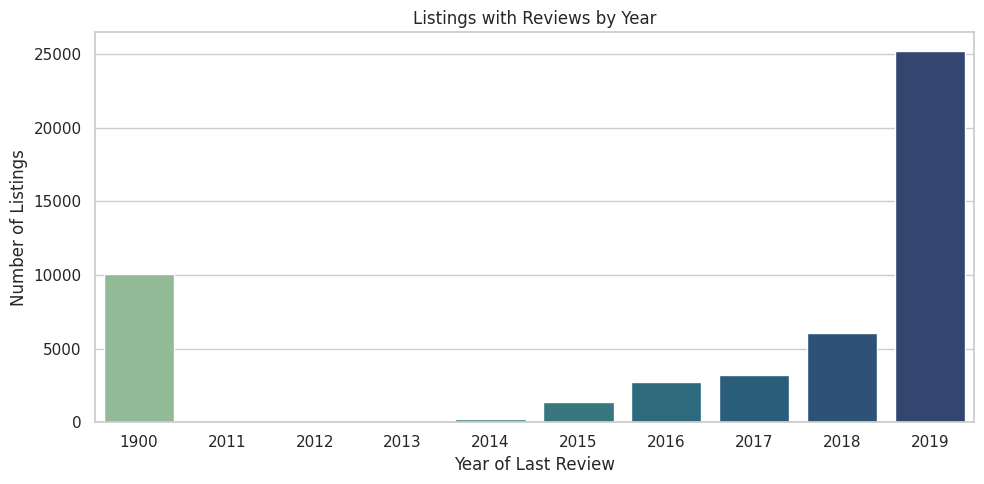

In [ ]:
#Temporal activity (trend of last reviews by year)
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x="last_review_year",
    palette="crest"
)
plt.title("Listings with Reviews by Year")
plt.xlabel("Year of Last Review")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

Here's a detailed narrative incorporating the key insights from the data:

The NYC Airbnb Story: A Look at Listings, Prices, and Popularity

Our analysis of the NYC Airbnb dataset from 2019 reveals a dynamic and diverse market, with distinct trends across different boroughs and listing types.

Where are the Listings?

Manhattan and Brooklyn Dominate: The vast majority of Airbnb listings are concentrated in two boroughs: Manhattan and Brooklyn. Manhattan leads slightly in the sheer number of listings, closely followed by Brooklyn. This highlights their status as prime locations for both tourists and residents seeking short-term rentals.
Queens Offers an Alternative: Queens has a significant number of listings, though considerably fewer than Manhattan or Brooklyn. This suggests it might be a more accessible or quieter option for visitors.
Bronx and Staten Island are Emerging: The Bronx and Staten Island have a much smaller share of the market, indicating they are less established Airbnb destinations, potentially offering different types of experiences or catering to different traveler needs.
What Kind of Places are Available?

Entire Homes/Apartments are Most Common: Across NYC, "Entire home/apt" is the most prevalent room type, slightly outnumbering "Private room" listings. This suggests a strong demand for independent accommodations.
Shared Rooms are Rare: "Shared room" listings make up a very small portion of the market, indicating this is a less popular or less offered option.
How Much Do They Cost?

Prices Vary Greatly: The price of an Airbnb listing in NYC can range significantly, from very affordable options to high-end rentals. While the average price is around $150, it's important to consider the price per night, which accounts for minimum stay requirements.
Manhattan is the Most Expensive: As expected, Manhattan generally has the highest prices per night, especially for "Entire home/apt" listings. This aligns with its reputation as a high-cost area.
Brooklyn and Queens Offer More Moderate Prices: Brooklyn and Queens offer more varied pricing, with a larger proportion of listings falling into the "Budget" and "Mid" price bands compared to Manhattan.
Price Bands Show Affordability Differences: When we categorize listings into price bands (Budget, Mid, High, Premium), we see that Manhattan has a larger share of "Mid" and "High" priced listings, while other boroughs, particularly the Bronx and Staten Island, have a much higher concentration of "Budget" listings.
How Long Do People Stay?

Short Stays are Most Popular: The data clearly shows that "short stays" (minimum nights up to 3) are the most common booking duration. This aligns with the typical length of a tourist visit.
Week-long Stays are Also Frequent: "Week stays" (minimum nights 4-7) are the second most common, indicating a significant number of visitors stay for about a week.
Month-long and Long Stays are Less Frequent: Longer stays (minimum nights over 7) are less frequent, suggesting that Airbnb in NYC is primarily used for shorter trips rather than long-term rentals.
Who are the Hosts?

Casual Hosts Dominate: The majority of hosts are "casual," meaning they have only one listing. This suggests that many people are renting out a spare room or their primary residence occasionally.
Multi and Professional Hosts are Significant: There's also a substantial number of "multi" and "professional" hosts who manage a few or several listings, indicating a segment of individuals or small businesses using Airbnb more actively.
Enterprise Hosts Exist but are Fewer: A smaller group of "enterprise" hosts manage a large number of listings, suggesting larger property managers or companies are also utilizing the platform.
What About Popularity and Activity?

Review Counts Vary: The number of reviews a listing has received varies widely. While many listings have a low number of reviews, some have received hundreds, indicating high popularity and frequent bookings.
Reviews per Month Show Activity: The "reviews per month" metric gives us a sense of how actively a listing is being booked and reviewed. Some listings receive reviews very frequently, suggesting high demand.
Many Listings Have Not Been Reviewed Recently: A significant portion of listings haven't received a review in a long time, which could indicate they are no longer active or are booked through other channels. The large number of listings with a last review year of 1900 (our placeholder for missing values) highlights this.
The "Most Visited" Listing is in Queens: Interestingly, the listing with the highest number of reviews is a "Private room" in Jamaica, Queens. This shows that while Manhattan and Brooklyn have the most listings, popularity (as measured by reviews) isn't solely confined to those areas and can be high in other boroughs as well.
Geographical Insights

Distance Matters (Sometimes): While not a perfect correlation, there appears to be some relationship between price and distance from key points like Times Square or the most visited Airbnb. Listings closer to popular attractions in Manhattan tend to be more expensive, but this relationship is less clear in other boroughs.
In Summary:

The NYC Airbnb market in 2019 was heavily concentrated in Manhattan and Brooklyn, dominated by entire home/apartment and private room rentals. Prices varied significantly by borough and room type, with Manhattan being the most expensive. Short stays were the most common, and the market was primarily composed of casual hosts with a single listing, although multi-listing hosts were also a significant presence. While many listings showed signs of activity through recent reviews, a considerable number appeared inactive.

This analysis provides a foundation for understanding the supply, demand, and pricing dynamics of the NYC Airbnb market and can inform strategies for hosts, guests, and the platform itself.